In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
train_df=pd.read_csv('Housing_dataset_train (1).csv')
test_df=pd.read_csv("Housing_dataset_test (1).csv")

In [ ]:
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [ ]:
train_df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [ ]:
train_df.shape

(14000, 7)

In [ ]:
# missingg_vals

In [ ]:
# Merge the train and test dataset
merged_data=pd.concat([train_df,test_df],ignore_index=True)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             20000 non-null  int64  
 1   loc            18187 non-null  object 
 2   title          18278 non-null  object 
 3   bedroom        18201 non-null  float64
 4   bathroom       18195 non-null  float64
 5   parking_space  18189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
merged_data.shape

(20000, 7)

In [ ]:
missingg_vals=merged_data.isna().sum()

In [ ]:
missingg_vals

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price            6000
dtype: int64

In [ ]:
  # Most columns have missing values except the ID

In [ ]:
# Check missing values % in each column
percentage_missing=(missingg_vals/len(merged_data))*100

In [ ]:
percentage_missing

ID                0.000
loc               9.065
title             8.610
bedroom           8.995
bathroom          9.025
parking_space     9.055
price            30.000
dtype: float64

In [ ]:
# Check for duplicates
merged_data.duplicated().sum()

0

In [ ]:
# There are no duplicated data, thse missing values will be inputted by either mode or mean.


<Axes: xlabel='price', ylabel='Count'>

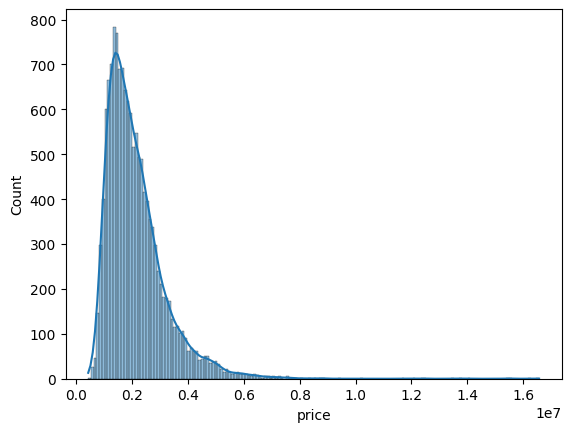

In [ ]:
# Check the price distribution.
sns.histplot(data=merged_data,x='price',kde=True)

In [ ]:
# The distribution is right skewed indicating that majority of house price are clustered towards the lower end price  range

In [ ]:
# Distribution of the other numerical data points.
def distrib(df,col):
    sns.histplot(data=df,x=col,kde=True)
    plt.title(col)
    plt.show()

In [ ]:
merged_data.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [ ]:
numeric_cols=['bedroom','bathroom','parking_space']

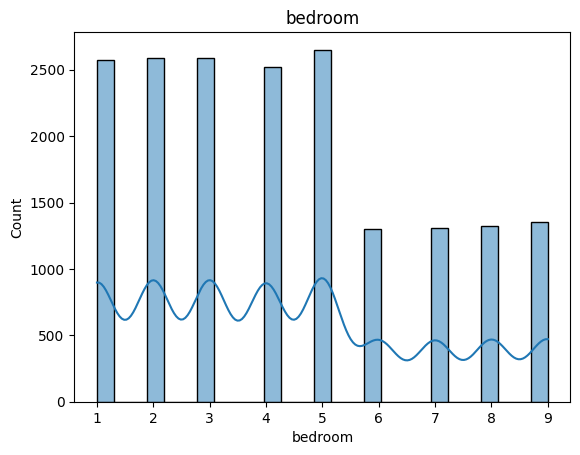

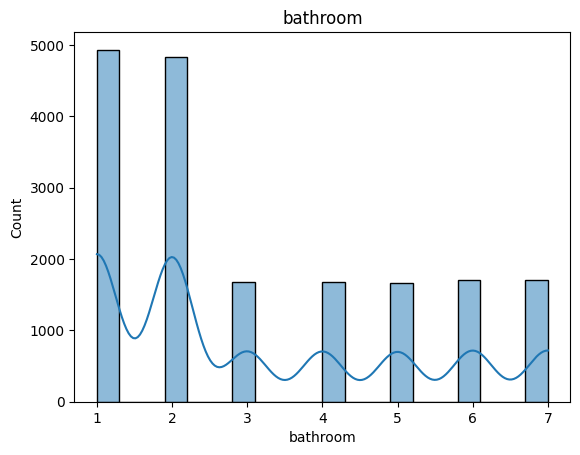

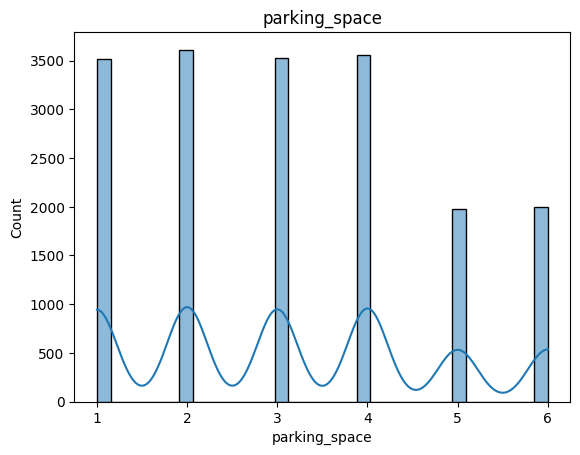

In [ ]:
for col in numeric_cols:
    distrib(merged_data,col)

In [ ]:
# All the other numeric columns are also right skewed. Majority of data points lying to the left.

<Axes: xlabel='count', ylabel='title'>

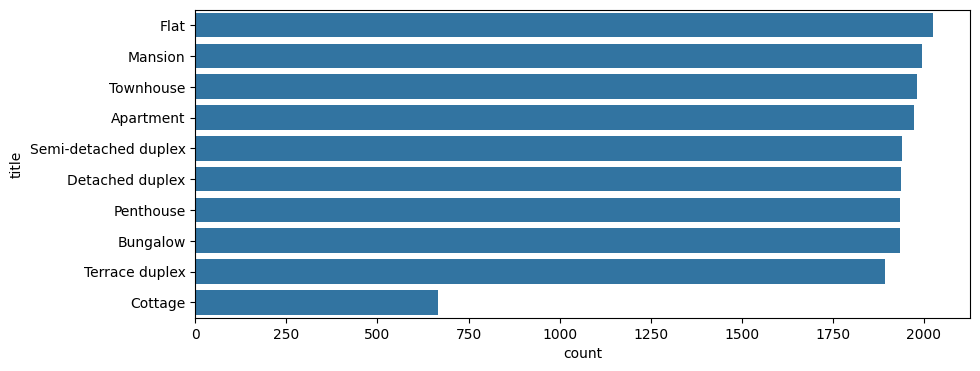

In [ ]:
# Check the type of houses mostly built
plt.figure(figsize=(10,4))
house_type=merged_data['title'].value_counts()
sns.barplot(data=house_type,orient='h')

In [ ]:
# Most houses are flats

In [ ]:
merged_data['loc'].unique()

array(['Katsina', 'Ondo', 'Ekiti', 'Anambra', 'Kogi', 'Borno', 'Kwara',
       'Osun', 'Kaduna', 'Ogun', 'Bayelsa', nan, 'Abia', 'Rivers',
       'Taraba', 'Ebonyi', 'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Delta',
       'Kano', 'Yobe', 'Benue', 'Bauchi', 'Cross River', 'Niger',
       'Adamawa', 'Plateau', 'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa',
       'Gombe', 'Akwa Ibom', 'Lagos'], dtype=object)

<Axes: xlabel='loc', ylabel='price'>

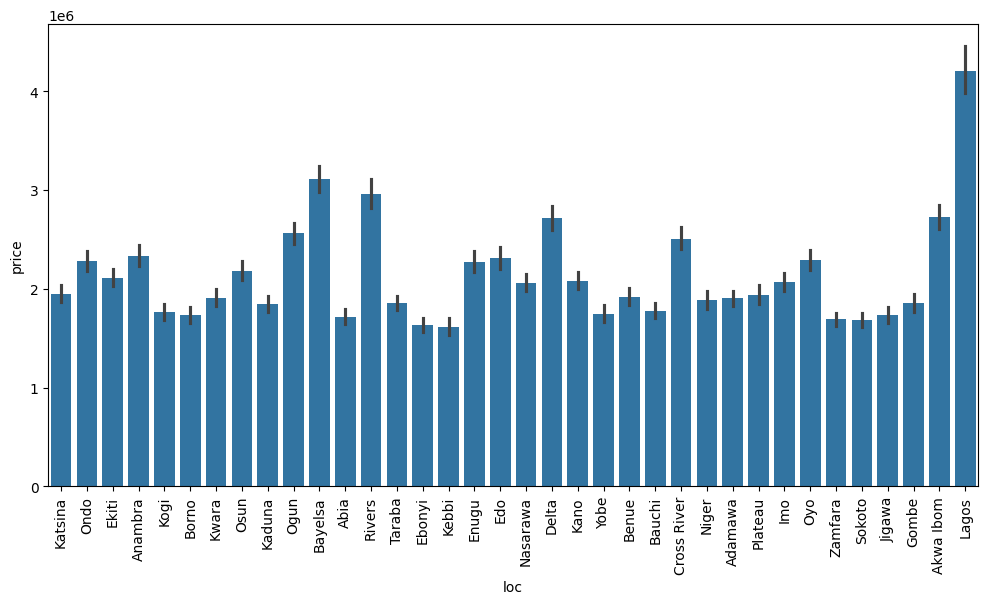

In [ ]:
# Location and price rls
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x='loc',y='price',data=merged_data)


In [ ]:
# Lagos houses have higher prices as compared to other states/locations

<Axes: xlabel='title', ylabel='price'>

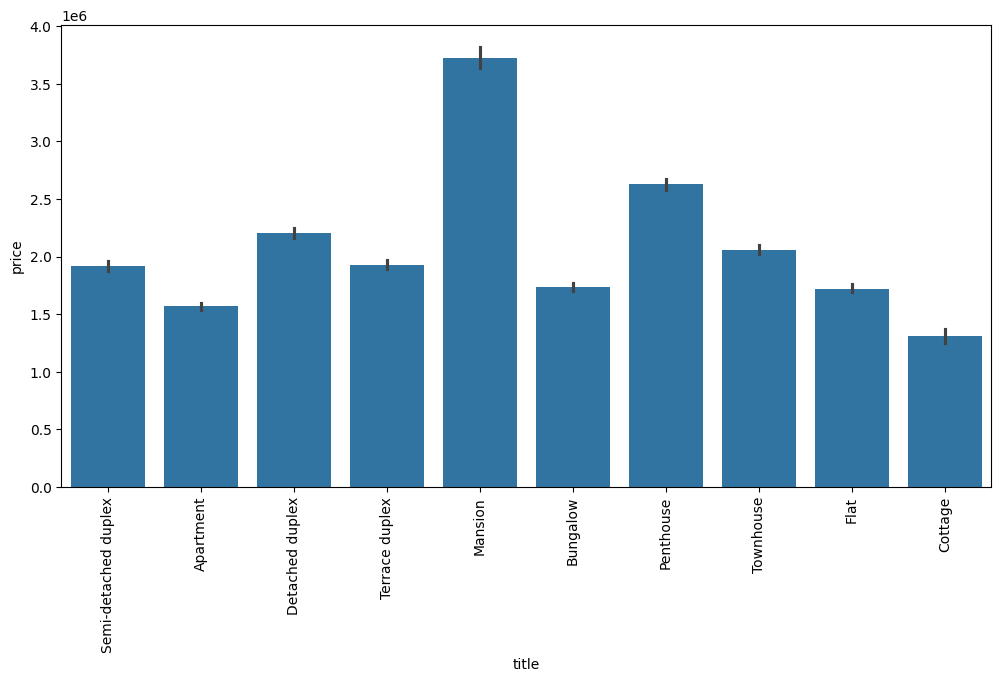

In [ ]:
# Price by house type
# Location and price rls
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x='title',y='price',data=merged_data)


In [ ]:
# Mansions are the most pricey followed by penthouses, other houses have relative prces

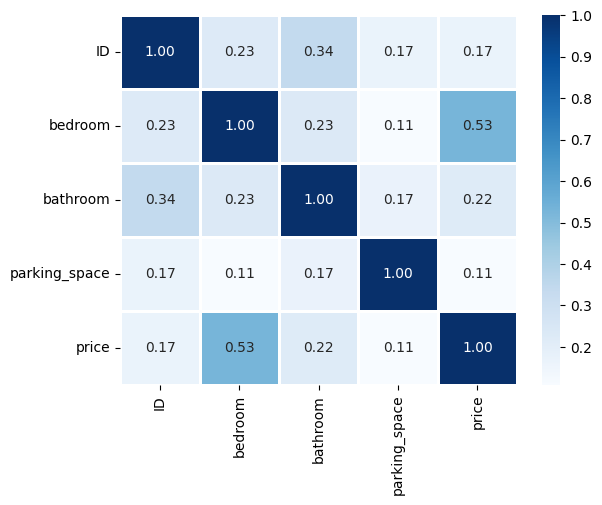

In [ ]:
# correlation of columns with price
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf=merged_data.select_dtypes(numerics)
sns.heatmap(newdf.corr(),
            cmap='Blues',
            fmt='.2f',
            linewidths=2,
            annot=True);

In [ ]:
# Bedrooms are highly positively correlated with price compared to other parameters.

<Axes: >

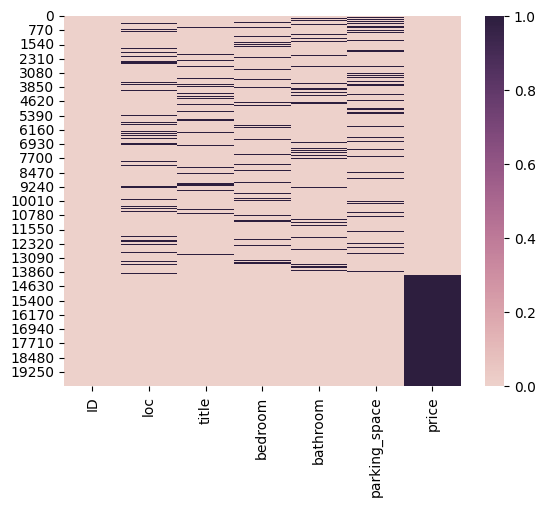

In [ ]:
# Handling missing values.
sns.heatmap(merged_data.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

In [ ]:
def fill_missing(df,col):
    frequent=df[col].mode()[0]
    df[col]=df[col].fillna(frequent)
    

In [ ]:
missin_cols=merged_data.columns[merged_data.isnull().any()].tolist()

In [ ]:
excluded_price=missin_cols[0:5]

In [ ]:
excluded_price

['loc', 'title', 'bedroom', 'bathroom', 'parking_space']

In [ ]:
for col in excluded_price:
    fill_missing(merged_data,col)


<Axes: >

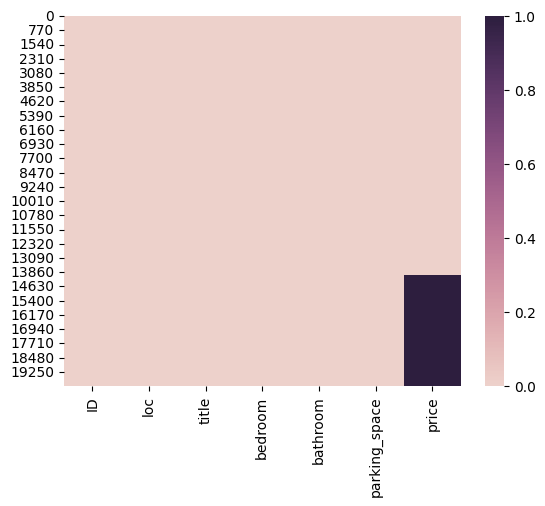

In [ ]:
sns.heatmap(merged_data.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

In [ ]:
# Encode categorical columns using category encoders.

In [ ]:
import category_encoders as ce
# encoder=ce.TargetEncoder(cols=['loc'])
# df=merged_data.copy()
# # Fit encoder to target since they have a strong relationship
# encoder.fit(df['loc'],df['price'])
# df['e_location']=encoder.transform(df['loc'])

In [ ]:
# df.drop('loc', axis=1, inplace=True)


In [ ]:
# df.head()

In [ ]:
# def encoder_transform(df,col,enc_col,target):
#     encoder=ce.TargetEncoder(cols=[col])
#     encoder.fit(df[col],df[target])
#     df[enc_col]=encoder.transform(df[col])
#     df.drop(col,axis=1,inplace=True)
    
def encoder_transform(df, col, enc_col):
    encoder = ce.OrdinalEncoder()
    df[enc_col] = encoder.fit_transform(df[col])
    df.drop(col,axis=1,inplace=True)

    
    return df
    




In [ ]:
merged_data['loc'].unique()


array(['Katsina', 'Ondo', 'Ekiti', 'Anambra', 'Kogi', 'Borno', 'Kwara',
       'Osun', 'Kaduna', 'Ogun', 'Bayelsa', 'Abia', 'Rivers', 'Taraba',
       'Ebonyi', 'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Delta', 'Kano',
       'Yobe', 'Benue', 'Bauchi', 'Cross River', 'Niger', 'Adamawa',
       'Plateau', 'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa', 'Gombe',
       'Akwa Ibom', 'Lagos'], dtype=object)

In [ ]:
merged_data['title'].unique()

array(['Semi-detached duplex', 'Apartment', 'Flat', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Cottage'], dtype=object)

In [ ]:
cat_cols=['title','loc']
e_rename=['e_title','e_location']
# target='price'
e_df=merged_data.copy()
# for i in range(len(cat_cols)):
#     encoder_transform(e_df,cat_cols[i],e_rename[i],target)

for i in range(len(cat_cols)):
    encoder_transform(e_df,cat_cols[i],e_rename[i])
    

In [ ]:
e_df.head()

,ID,bedroom,bathroom,parking_space,price,e_title,e_location
0,3583,2.0,2.0,1.0,1149999.565,1,1
1,2748,5.0,2.0,4.0,1672416.689,2,2
2,9261,7.0,5.0,2.0,3364799.814,3,3
3,2224,5.0,2.0,4.0,2410306.756,4,4
4,10300,5.0,5.0,6.0,2600700.898,5,5


In [ ]:
e_df.drop('ID',axis=1,inplace=True)

In [ ]:
e_df.head()

,bedroom,bathroom,parking_space,price,e_title,e_location
0,2.0,2.0,1.0,1149999.565,1,1
1,5.0,2.0,4.0,1672416.689,2,2
2,7.0,5.0,2.0,3364799.814,3,3
3,5.0,2.0,4.0,2410306.756,4,4
4,5.0,5.0,6.0,2600700.898,5,5


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
models={
    "Linear Regression":LinearRegression(),
    "Random Forest":RandomForestRegressor(verbose=0)}


In [ ]:
# Create model dt set
train_processed = e_df.iloc[:len(train_df)]
test_processed = e_df.iloc[len(train_df):]


In [ ]:
X=train_processed.drop('price',axis=1)
y=train_processed['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Function to fit and score the models
def fit_and_score_model(X_train, y_train, X_test, y_test):
    model_Scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        rmse=np.sqrt(mean_squared_error(y_test,y_pred))
        r2score=r2_score(y_test,y_pred)
        model_Scores[name]={
            "rmse":rmse,
            "r2":r2score
        }
    return model_Scores
            
        

In [ ]:
scores=fit_and_score_model(X_train,y_train,X_test,y_test)

In [ ]:
scores

{'Linear Regression': {'rmse': 919276.5145374853, 'r2': 0.28454729671935175},
 'Random Forest': {'rmse': 624159.8656131547, 'r2': 0.6701775010362085}}

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


# Single prediction for RF

In [ ]:
tst=test_processed.drop(columns=['price'])
predictions = model.predict(tst)


In [ ]:
singlepred=e_df.drop('price',axis=1).iloc[0]

In [ ]:
framed=singlepred.to_frame().transpose()

In [ ]:
singv=model.predict(framed)

In [ ]:
singv

array([1459059.20414731])

In [ ]:
e_df.iloc[0]['price']

1149999.565

# Single pred for LR

In [ ]:
model2=LinearRegression()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
tst2=test_processed.drop(columns=['price'])
predictions2 = model.predict(tst2)



In [ ]:
singv2=model2.predict(framed)

In [ ]:
singv2

array([1181649.60533945])

In [ ]:
e_df.iloc[0]['price']

1149999.565

In [ ]:
import pickle 


In [ ]:
with open('RFmodel2.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
e_df[e_df['price']==2410306.756]